In [2]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv('DS_Data.csv')
dataset.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
dataset.shape   # The data has 12684 rows and 25 columns .

(12684, 25)

In [5]:
# For the use of the Target variable 'Accept(Y/N?)' easily renamed into 'Accept' .

In [6]:
dataset.rename({'Accept(Y/N?)' : 'Accept'}, axis = 1 , inplace = True)

In [7]:
dataset.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# Data Preprocessing

In [8]:
dataset.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Accept                      0
dtype: int64

In [9]:
dataset.isnull().sum()/len(dataset) * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Accept                   0.000000
dtype: float64

<Axes: >

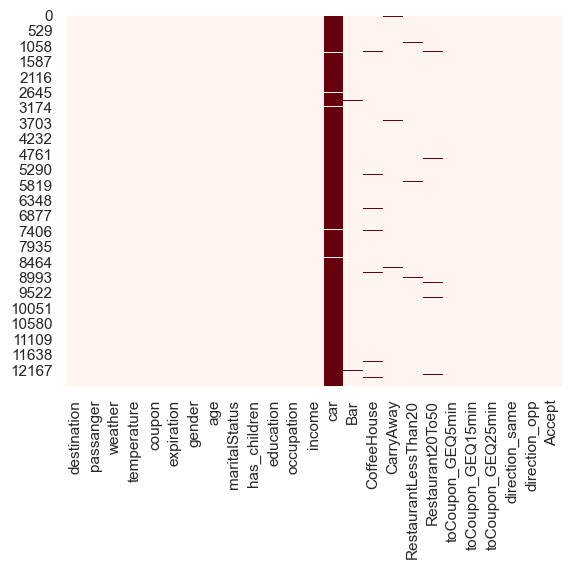

In [10]:
sns.heatmap(dataset.isnull(), cmap = 'Reds',fmt = '.1g', cbar = False )

In [11]:
# As per the Heatmap and dataset is null function in pandas depicts there is some missing values in the dataset .

In [12]:
dataset.drop(columns = 'car', axis = 1, inplace = True) # Beacuase of the majority of the datapoints is missing , hence dropped the columns of car.
dataset.shape

(12684, 24)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  Bar                   12577 non-null  object
 14  CoffeeHouse           12467 non-null  object
 15  CarryAway             12533 non-null

In [14]:
for i in dataset.columns:
    print('*************************************', i ,
          '**********************************')
    print()
    print(set(dataset[i].tolist()))
    print()
    
# In order to see the unique values in the data loop function has been runned so that the suitable encoding technique can be applied.

************************************* destination **********************************

{'Work', 'Home', 'No Urgent Place'}

************************************* passanger **********************************

{'Kid(s)', 'Friend(s)', 'Alone', 'Partner'}

************************************* weather **********************************

{'Rainy', 'Sunny', 'Snowy'}

************************************* temperature **********************************

{80, 30, 55}

************************************* coupon **********************************

{'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)', 'Bar'}

************************************* expiration **********************************

{'1d', '2h'}

************************************* gender **********************************

{'Male', 'Female'}

************************************* age **********************************

{'26', '21', '31', '41', '46', 'below21', '36', '50plus'}

*****************************

In [15]:
# Label Encoder used because majority of the column contains the labelled data need to encode them for getting the desired output for the classification problem.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = dataset.copy(deep=True)

text_data_features = [i for i in list(dataset.columns) if i not in list(dataset.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = le.fit_transform(df1[i])
    print(i, ' : ', df1[i].unique(), ' = ', le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
destination  :  [1 0 2]  =  ['No Urgent Place' 'Home' 'Work']
passanger  :  [0 1 2 3]  =  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather  :  [2 0 1]  =  ['Sunny' 'Rainy' 'Snowy']
coupon  :  [4 2 1 0 3]  =  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration  :  [0 1]  =  ['1d' '2h']
gender  :  [0 1]  =  ['Female' 'Male']
age  :  [0 5 1 2 4 6 3 7]  =  ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus  :  [3 2 1 0 4]  =  ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education  :  [5 1 0 3 2 4]  =  ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation  :  [24  0 22  7 11 10 21 15  1  5 14 17  4 16  6 13 20 12 23  3 19  9 18  2
  8]  =  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & T

In [16]:
# Temperature is also encoded so that it doesn't create the problem while doing the feature scaling part .
# It might effect the result as well as it can be seen in the Pandas describe function.
from sklearn.preprocessing import LabelEncoder

def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

df1['temperature'] =  label_encoder(df1['temperature'])

temperature [30 55 80]


In [17]:
dataset['income'].value_counts() # Income Set of values is depicted in this result.

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [18]:
dataset.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [19]:
dataset.isnull().sum()  # Number of missing values in the data.

destination               0
passanger                 0
weather                   0
temperature               0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Accept                    0
dtype: int64

In [20]:
df1.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Accept                  0
dtype: int64

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
destination,12684.0,0.994245,0.710393,0.0,0.0,1.0,1.0,2.0
passanger,12684.0,0.672895,0.941975,0.0,0.0,0.0,1.0,3.0
weather,12684.0,1.698439,0.633597,0.0,2.0,2.0,2.0,2.0
temperature,12684.0,1.332072,0.766179,0.0,1.0,2.0,2.0,2.0
coupon,12684.0,2.050221,1.348546,0.0,1.0,2.0,3.0,4.0
expiration,12684.0,0.440949,0.496520,0.0,0.0,0.0,1.0,1.0
gender,12684.0,0.486676,0.499842,0.0,0.0,0.0,1.0,1.0
age,12684.0,2.597997,2.224901,0.0,1.0,2.0,4.0,7.0
maritalStatus,12684.0,1.709398,0.832917,0.0,1.0,2.0,2.0,4.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0


In [22]:
dataset['Accept'].value_counts()

Accept
1    7210
0    5474
Name: count, dtype: int64

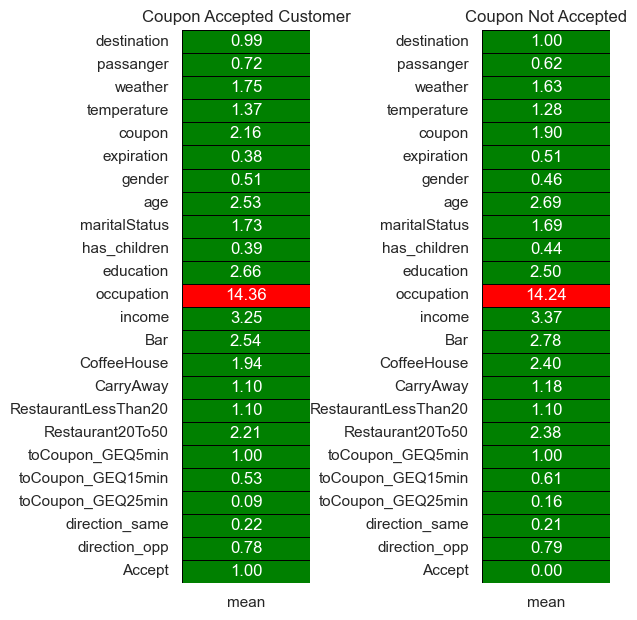

In [23]:
# The factors which is influencing the customer whether they are taking coupon or not.

colors = ['#E94B3C', '#2D2926']

coupon_yes = df1[df1['Accept'] == 1].describe().T
coupon_no = df1[df1['Accept'] == 0].describe().T

fig, ax = plt.subplots(nrows = 1, ncols =2 , figsize = (6,6))
plt.subplot(1,2,1)
sns.heatmap(coupon_yes[['mean']], annot=True, cmap=['Green','Red'], linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Coupon Accepted Customer')

plt.subplot(1,2,2)
sns.heatmap(coupon_no[['mean']], annot=True, cmap=['Green','Red'], linewidths=0.4, linecolor = 'black',
            cbar=False, fmt='.2f')
plt.title('Coupon Not Accepted')

fig.tight_layout(pad=0)

## EDA

In [24]:
dataset.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Separated the Categorical feature and the Numerical features on the baasis unique values of the dataset.

col = list(df1.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(dataset[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : destination passanger weather temperature coupon expiration gender maritalStatus has_children education Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp Accept

numerical_features : age occupation income


In [27]:
list(df1.columns)

['destination',
 'passanger',
 'weather',
 'temperature',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Accept']

In [28]:
df1.dtypes

destination             int32
passanger               int32
weather                 int32
temperature             int64
coupon                  int32
expiration              int32
gender                  int32
age                     int32
maritalStatus           int32
has_children            int64
education               int32
occupation              int32
income                  int32
Bar                     int32
CoffeeHouse             int32
CarryAway               int32
RestaurantLessThan20    int32
Restaurant20To50        int32
toCoupon_GEQ5min        int64
toCoupon_GEQ15min       int64
toCoupon_GEQ25min       int64
direction_same          int64
direction_opp           int64
Accept                  int64
dtype: object

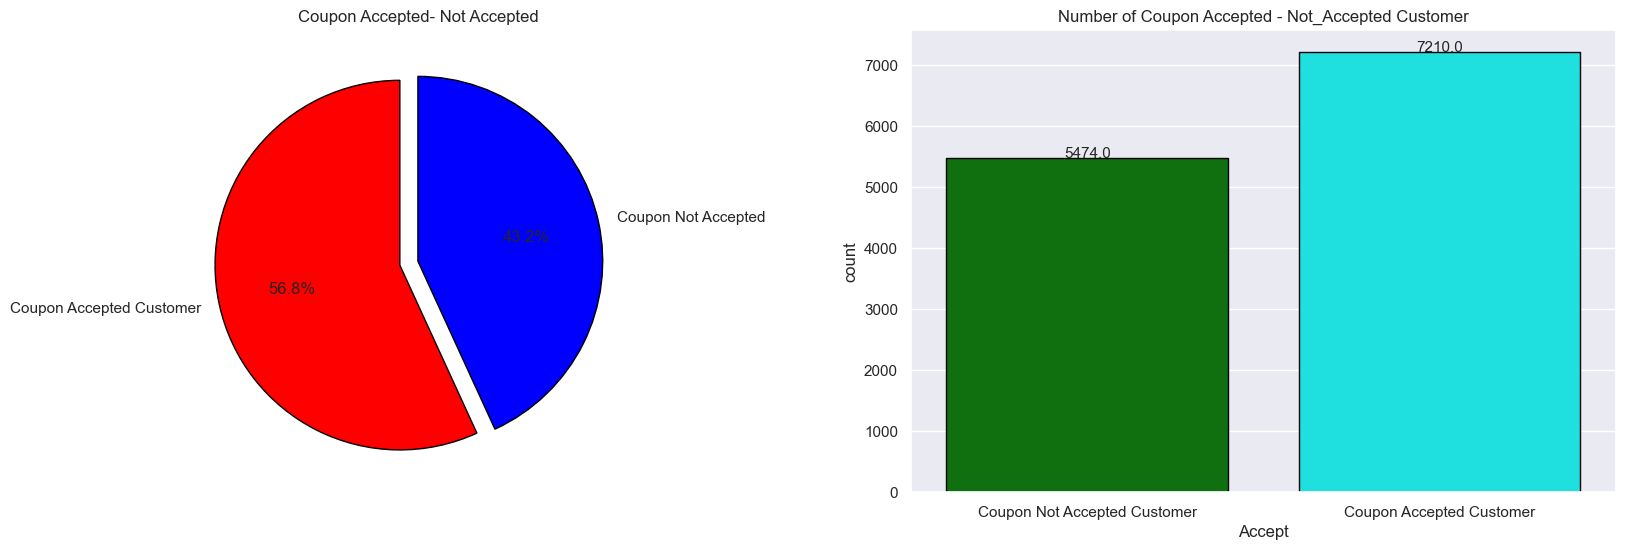

In [29]:
# Shown Pie chart and Bargraph for the target variable whether it is required to handle the Imbalance dataset .

l = list(df1['Accept'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Coupon Accepted Customer', 'Coupon Not Accepted'], autopct = '%1.1f%%', startangle=90,
       explode = (0.1,0), colors = ['Red','Blue'] , wedgeprops  = {'edgecolor' : 'black', 
                                                          'linewidth':1, 'antialiased' : True})
plt.title('Coupon Accepted- Not Accepted')

plt.subplot(1,2,2)

ax = sns.countplot(x='Accept', data = dataset, palette = ['Green','Aqua'], edgecolor = 'black')

for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment = 'center', fontsize=11)
ax.set_xticklabels(['Coupon Not Accepted Customer', 'Coupon Accepted Customer'])

plt.title('Number of Coupon Accepted - Not_Accepted Customer');
plt.show()  

In [30]:
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [31]:
categorical_features

['destination',
 'passanger',
 'weather',
 'temperature',
 'coupon',
 'expiration',
 'gender',
 'maritalStatus',
 'has_children',
 'education',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Accept']

In [32]:
categorical_features.remove('Accept')

In [33]:
l1 = categorical_features
print(l1)

['destination', 'passanger', 'weather', 'temperature', 'coupon', 'expiration', 'gender', 'maritalStatus', 'has_children', 'education', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']


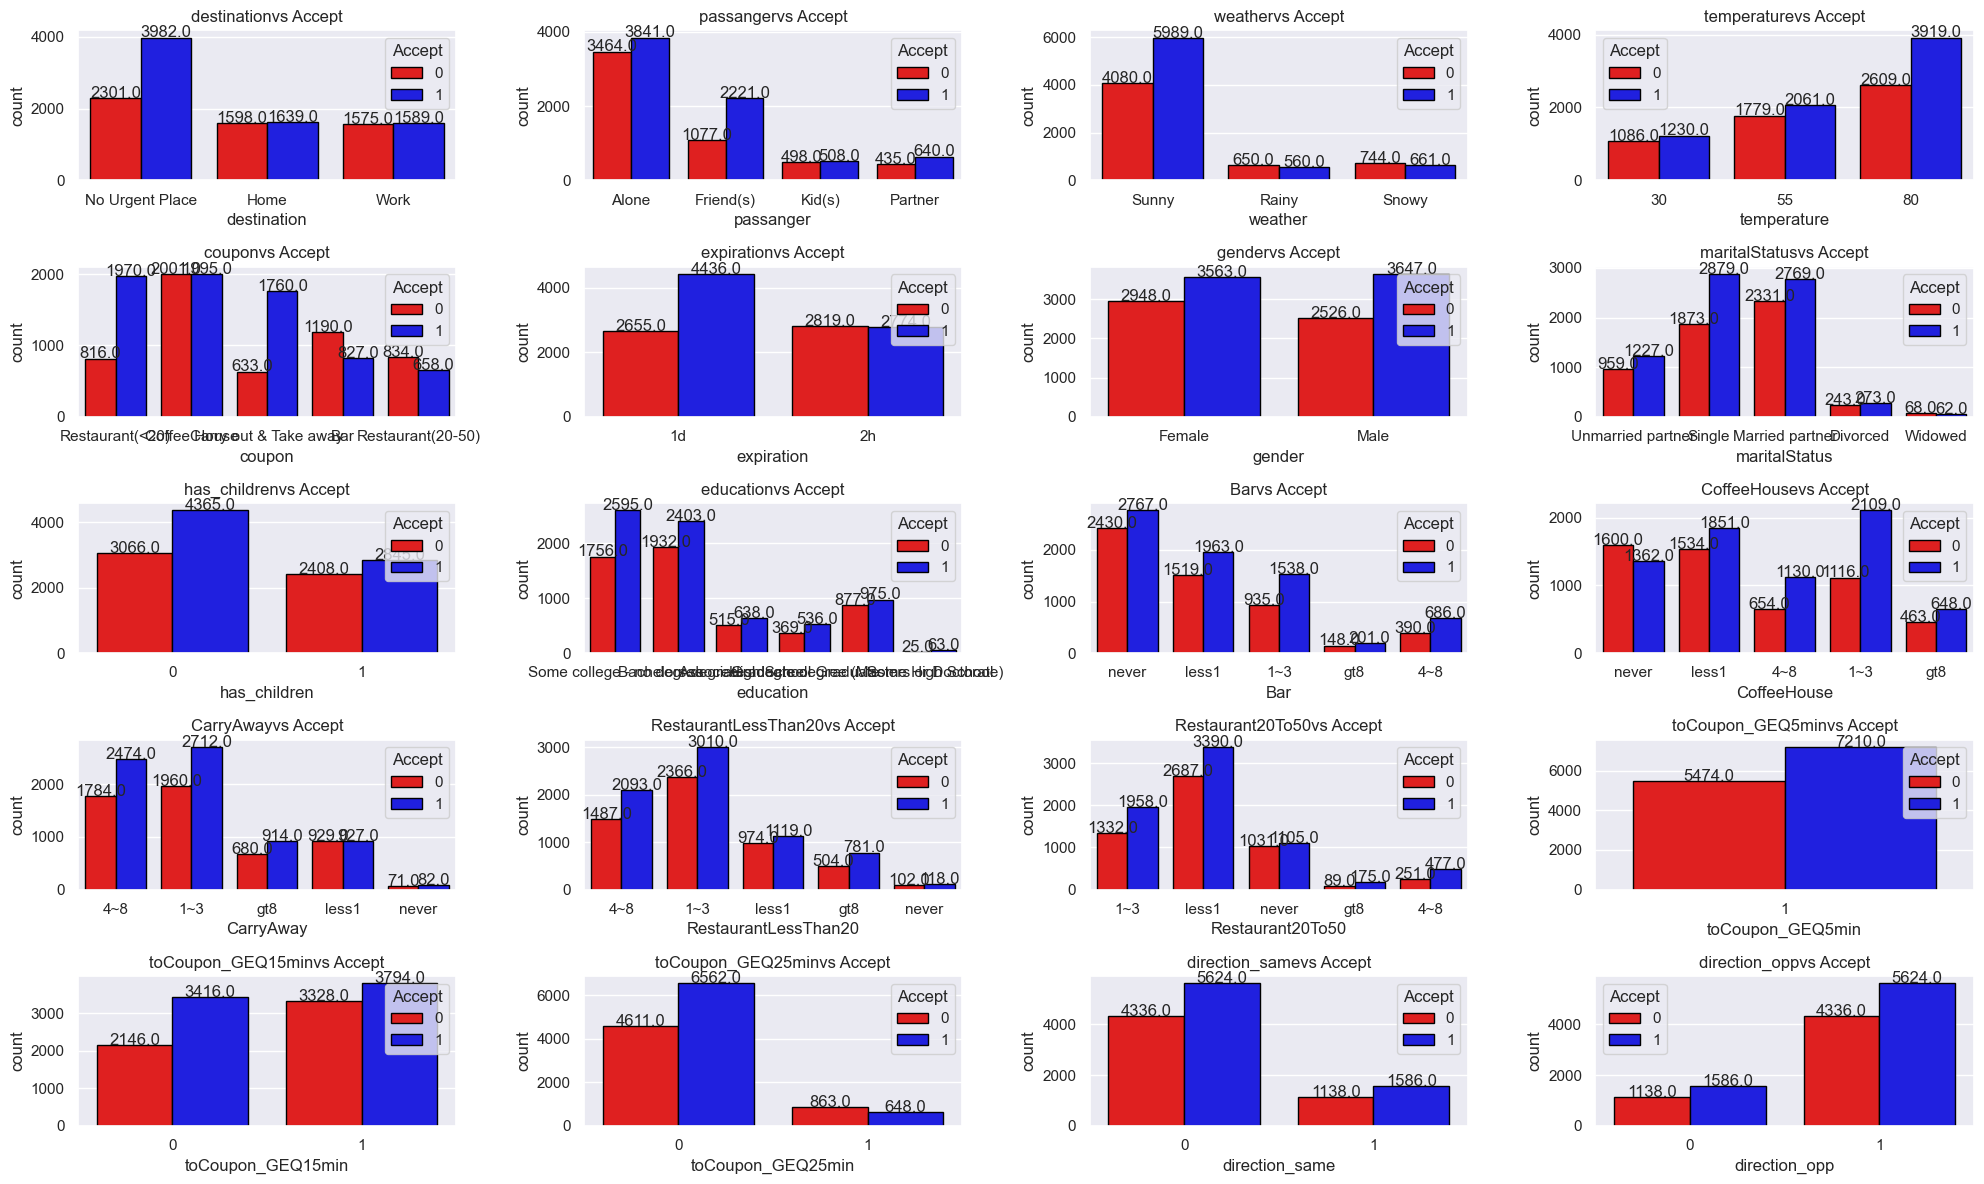

In [34]:
# We have shown the relationship with the target(dependent) variable vs all the Independent variable. To get some visibilty of the features involved.

fig  = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for i in range(len(l1)):
    plt.subplot(5,4,i+1)
    ax = sns.countplot(x=l1[i], data=dataset, hue='Accept', palette=['Red','Blue'], edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2,rect.get_height() + 2, rect.get_height(),
                horizontalalignment='center')
        title = l1[i] + 'vs Accept'
        plt.tight_layout()
        plt.title(title);

In [35]:
numerical_features

['age', 'occupation', 'income']

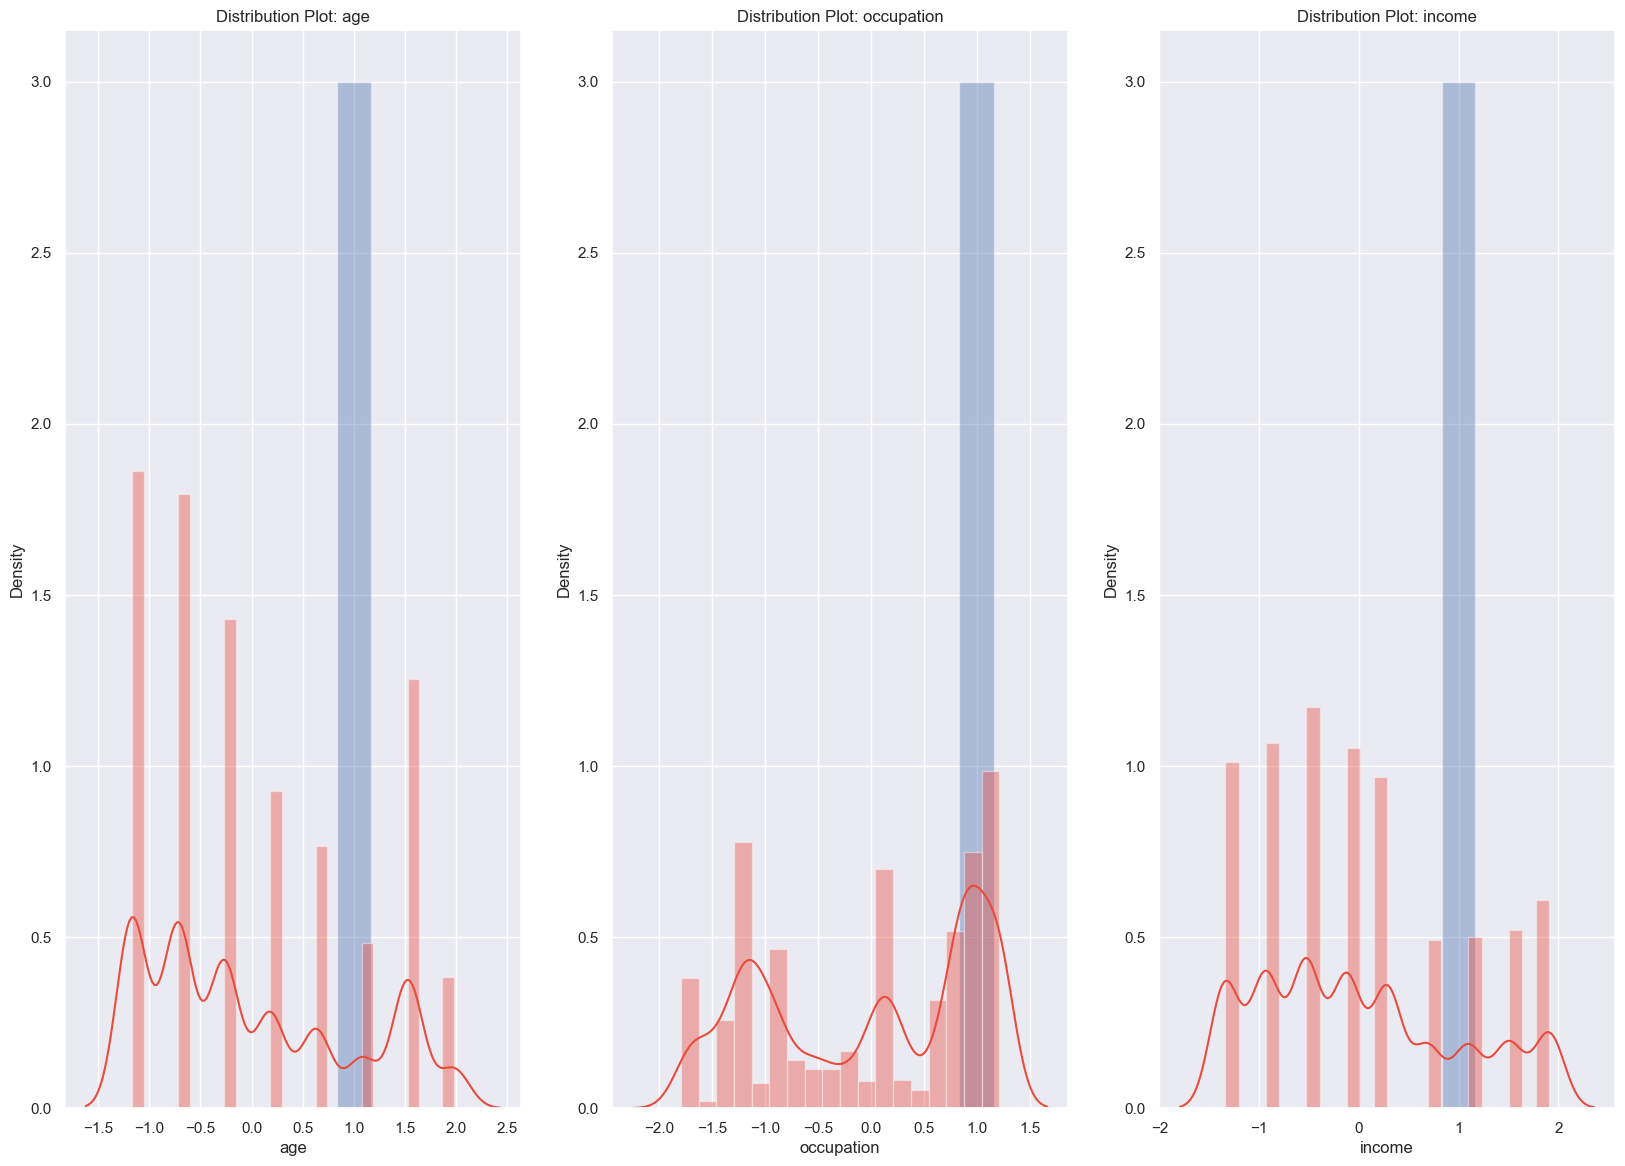

In [85]:
# Shown the Distribution plot for the numerical features.

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,14))
for i in range(len(numerical_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(1,3,i+1)
    sns.distplot(df1[numerical_features[i]], color = colors[0])
    title = 'Distribution Plot: ' + numerical_features[i]
    plt.title(title)
plt.show()

## Feature Scaling 

In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
destination,12684.0,0.994245,0.710393,0.0,0.0,1.0,1.0,2.0
passanger,12684.0,0.672895,0.941975,0.0,0.0,0.0,1.0,3.0
weather,12684.0,1.698439,0.633597,0.0,2.0,2.0,2.0,2.0
temperature,12684.0,1.332072,0.766179,0.0,1.0,2.0,2.0,2.0
coupon,12684.0,2.050221,1.348546,0.0,1.0,2.0,3.0,4.0
expiration,12684.0,0.440949,0.496520,0.0,0.0,0.0,1.0,1.0
gender,12684.0,0.486676,0.499842,0.0,0.0,0.0,1.0,1.0
age,12684.0,2.597997,2.224901,0.0,1.0,2.0,4.0,7.0
maritalStatus,12684.0,1.709398,0.832917,0.0,1.0,2.0,2.0,4.0
has_children,12684.0,0.414144,0.492593,0.0,0.0,0.0,1.0,1.0


In [37]:
# Feature Scaling is required for that only one or two feature doesn't drive the model and leads to poor result .
# Numerical Features =  ['occupation', 'age', 'income' ]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['occupation']  = scaler.fit_transform(df1[['occupation']])
df1['age']  = scaler.fit_transform(df1[['age']])
df1['income']  = scaler.fit_transform(df1[['income']])
df1.head().T

,0,1,2,3,4
destination,1.000000,1.000000,1.000000,1.000000,1.000000
passanger,0.000000,1.000000,1.000000,1.000000,1.000000
weather,2.000000,2.000000,2.000000,2.000000,2.000000
temperature,1.000000,2.000000,2.000000,2.000000,2.000000
coupon,4.000000,2.000000,1.000000,2.000000,2.000000
expiration,0.000000,1.000000,1.000000,1.000000,0.000000
gender,0.000000,0.000000,0.000000,0.000000,0.000000
age,-1.167737,-1.167737,-1.167737,-1.167737,-1.167737
maritalStatus,3.000000,3.000000,3.000000,3.000000,3.000000
has_children,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation Part

In [ ]:
# The correlation parts depicts there is no corelation among the features involved in the model before the split of the data for training and testing the model.

<Axes: >

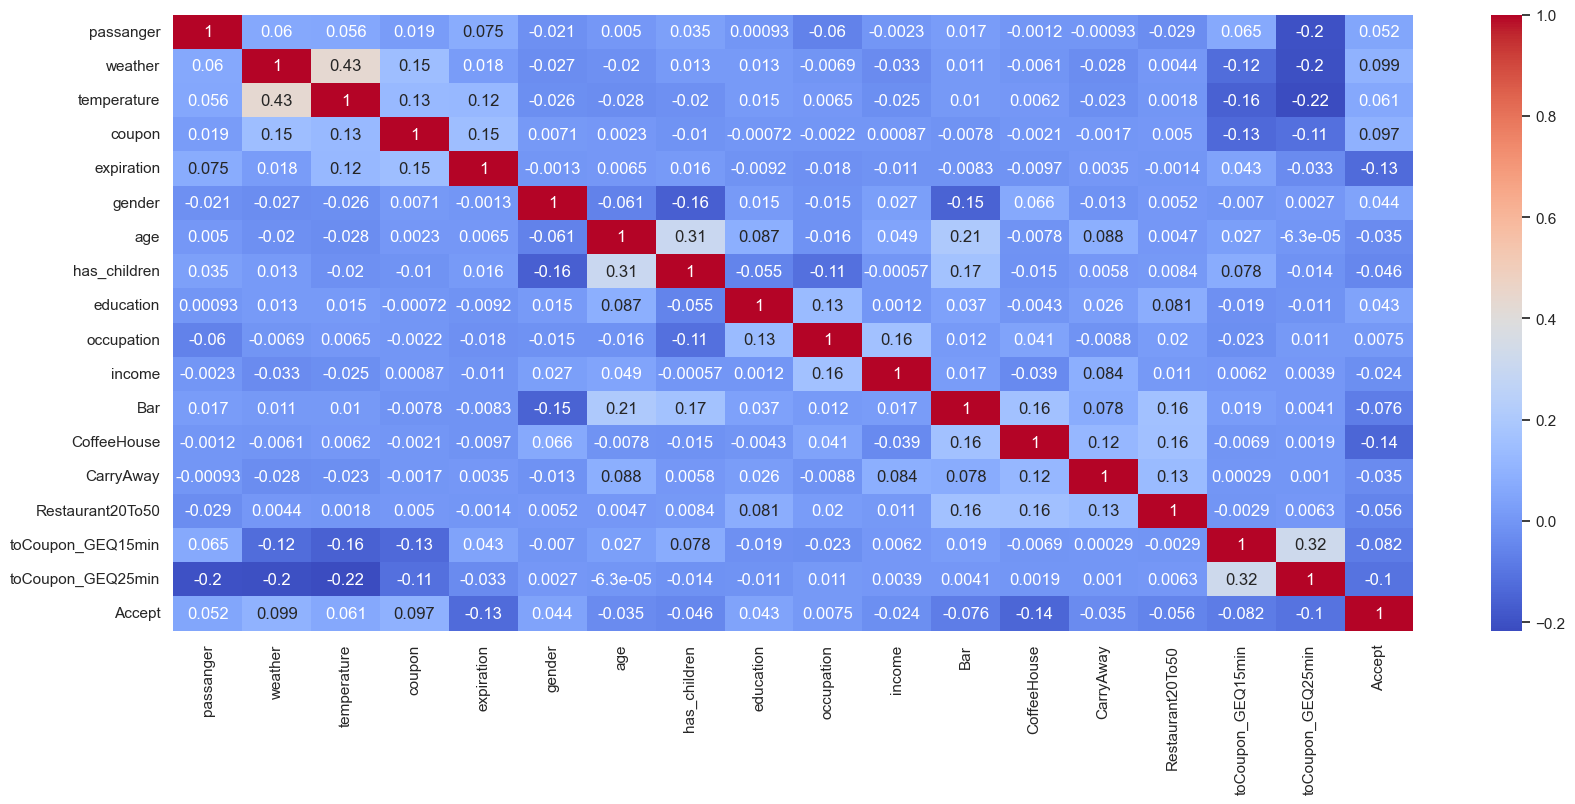

In [84]:
plt.figure(figsize = (20,8))
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True)

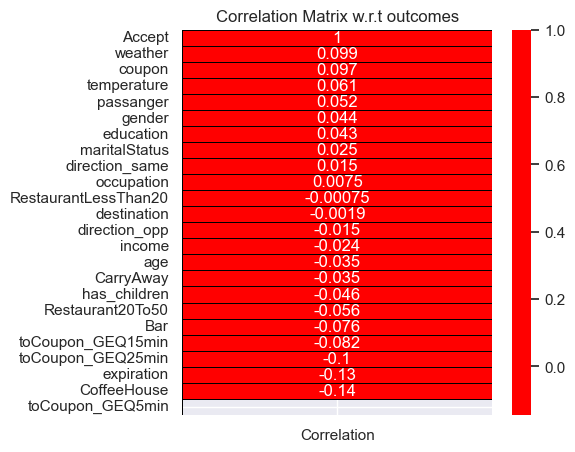

In [40]:
corr = df1.corrwith(df1['Accept']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot =True , cmap =['Red'] , linewidths = 0.4, linecolor = 'black')
plt.title("Correlation Matrix w.r.t outcomes")
plt.show()

In [42]:
# categorical_features - chi-square test
# numerical_features  - Anova test

# Chi-Square test

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [ ]:
# Chi Square test as there are lot of categorical data which might leads to overfitting problem so removed irrelevant features from the dataset based on the values provided.

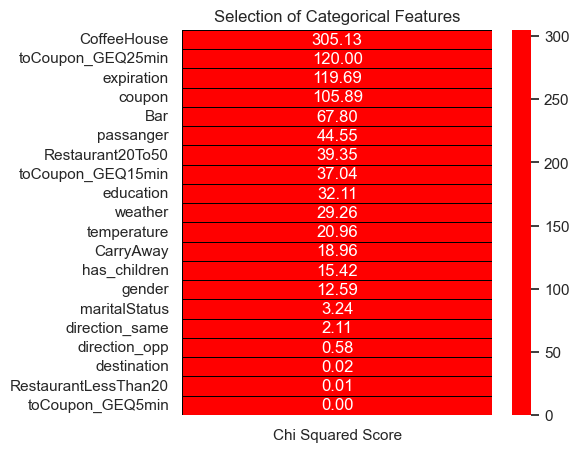

In [44]:
features = df1.loc[:, categorical_features]
target = df1.loc[:,'Accept']
best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index = list(categorical_features), columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
           annot = True, cmap = ['Red'], linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

In [45]:
col = list(df1.columns)
categorical_features = []
numerical_features = []

for i in col:
    if len(dataset[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('categorical_features :', *categorical_features)
print()
print("numerical_features :", *numerical_features)

categorical_features : destination passanger weather temperature coupon expiration gender maritalStatus has_children education Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp Accept

numerical_features : age occupation income


In [46]:
categorical_features

['destination',
 'passanger',
 'weather',
 'temperature',
 'coupon',
 'expiration',
 'gender',
 'maritalStatus',
 'has_children',
 'education',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Accept']

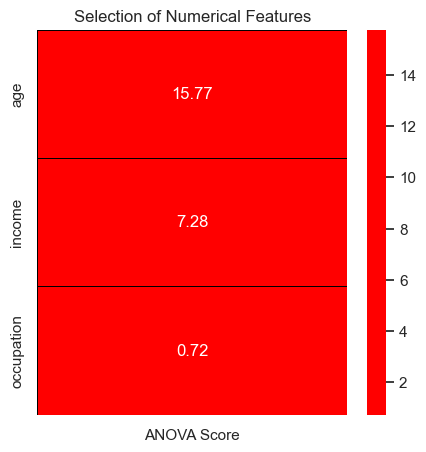

In [52]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Accept']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = ['Red'], linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

In [53]:
# Drop the non significant variable based on the data points

df1.drop(columns = ['maritalStatus','direction_same', 'direction_opp', 'destination', 'RestaurantLessThan20','toCoupon_GEQ5min'], inplace = True)
df1.head()

,passanger,weather,temperature,coupon,expiration,gender,age,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,Accept
0,0,2,1,4,0,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,0,0,1
1,1,2,2,2,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,0,0,0
2,1,2,2,1,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0,1
3,1,2,2,2,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0,0
4,1,2,2,2,0,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0,0


In [54]:
df1['Accept'].value_counts()

Accept
1    7210
0    5474
Name: count, dtype: int64

In [55]:
df1['Accept'].value_counts(normalize = True) # No need to do imbalance treatment as the data seems to be perfectly balanced .

Accept
1    0.568433
0    0.431567
Name: proportion, dtype: float64

# Splitting Data

In [56]:
x = df1.iloc[:, 0:-1]
y = df1[['Accept']]

In [57]:
x.head()

,passanger,weather,temperature,coupon,expiration,gender,age,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min
0,0,2,1,4,0,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,0,0
1,1,2,2,2,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,0,0
2,1,2,2,1,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0
3,1,2,2,2,1,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0
4,1,2,2,2,0,0,-1.167737,1,5,1.212597,-0.122576,4,4,5,0,1,0


In [58]:
y.head()

,Accept
0,1
1,0
2,1
3,0
4,0


In [93]:
# Splitting the data into training and test 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.20, random_state = 33 , stratify = y )

In [94]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Random Forest Classifier Model

In [ ]:
# Using the Random Forest model as it is the best model for the classification problem.

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [96]:
f_df = pd.DataFrame({"feature" : x_train.columns, 'rf_importance': rf.feature_importances_}).sort_values(by = 'rf_importance', ascending = False)

In [97]:
f_df

,feature,rf_importance
3,coupon,0.147245
9,occupation,0.104708
10,income,0.089702
6,age,0.075305
12,CoffeeHouse,0.071953
11,Bar,0.061753
13,CarryAway,0.058412
8,education,0.057740
0,passanger,0.055796
14,Restaurant20To50,0.053362


In [98]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [99]:
print("***************Confusion Matrix*********************")
print(confusion_matrix(y_train, pred_train_rf))
print("*******************************")
print(confusion_matrix(y_test, pred_test_rf))

***************Confusion Matrix*********************
[[4257  122]
 [  63 5705]]
*******************************
[[ 718  377]
 [ 286 1156]]


In [100]:
print("***************classification_report*********************")
print(classification_report(y_train, pred_train_rf))
print("*******************************")
print(classification_report(y_test, pred_test_rf))

***************classification_report*********************
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4379
           1       0.98      0.99      0.98      5768

    accuracy                           0.98     10147
   macro avg       0.98      0.98      0.98     10147
weighted avg       0.98      0.98      0.98     10147

*******************************
              precision    recall  f1-score   support

           0       0.72      0.66      0.68      1095
           1       0.75      0.80      0.78      1442

    accuracy                           0.74      2537
   macro avg       0.73      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



In [101]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf))

***************accuracy_score*********************
0.9817680102493348
*******************************
0.7386677177769019


In [102]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=17, step=1 )
feature_1 = feature_1.fit(x_train, y_train)

In [103]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [104]:
print("***************accuracy_score*********************")
print(accuracy_score(y_train, pred_train_rf1))
print("*******************************")
print(accuracy_score(y_test, pred_test_rf1))

***************accuracy_score*********************
0.9817680102493348
*******************************
0.7433977138352384


In [ ]:
# The Training result for the Random Forest Algorithm is 98 Percent and the Testing data is 74 Percent . 
# It depicts there is some Overfitting problem in the dataset. 
# So Cross Validation is also done in order to check the accuracy of the Data.

In [105]:
# cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score(feature_1, x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.75270936 0.73300493 0.72906404 0.74778325 0.73399015 0.7408867
 0.72413793 0.72583826 0.74654832 0.72682446]

0.7360787400044695


# XG Boost Classifier

In [106]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [107]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [108]:
print(accuracy_score(y_train, y_pred_train_xgb))
print()
print(accuracy_score(y_test, y_pred_test_xgb))

0.9020400118261556

0.752463539613717


# ROC Curve

In [109]:
dataset.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
from sklearn.metrics import roc_auc_score
rf_roc_auc = roc_auc_score(y_test,pred_test_rf1)
rf_roc_auc

0.7351544341636108

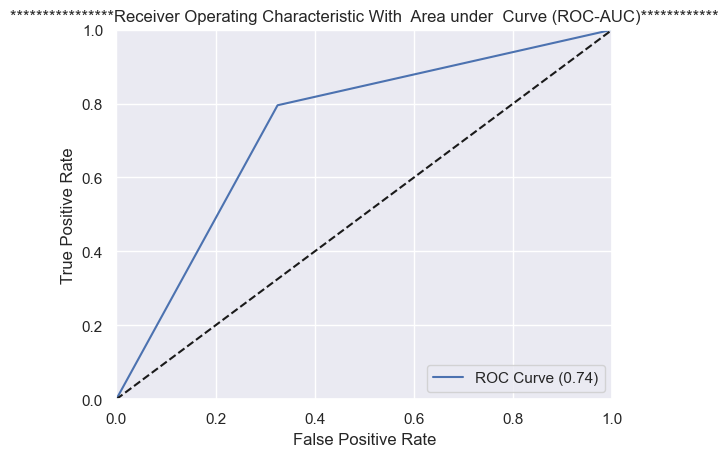

In [111]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test_rf1)

plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (%0.2f)" % rf_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("****************Receiver Operating Characteristic With  Area under  Curve (ROC-AUC)************")
plt.legend(loc = 'lower right')